# Semana 8 
Otras formas de hacer clustering. 




## Datos

Vamos a usar la función make_moons, que nos va a construir datos sintéticos con los que vamos a jugar para ver como se comportan nuestros algoritmos. 

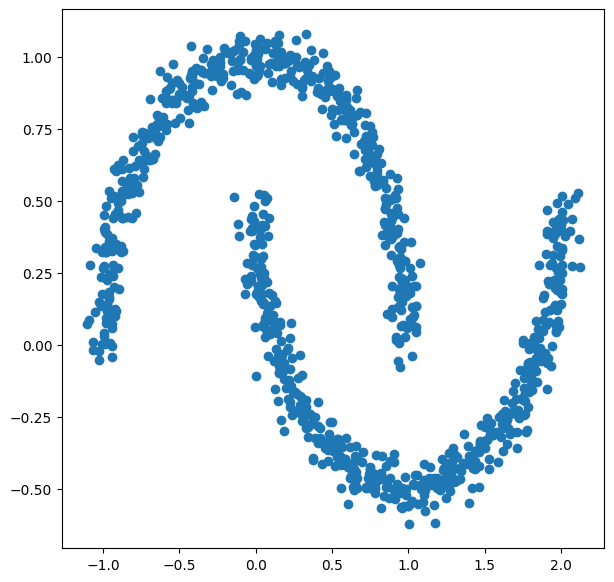

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import make_moons


X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)

plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1])
plt.show()



## DBSCAN

¡Veamos cómo logra separar las medialunas! 

In [2]:
from sklearn.cluster import DBSCAN

# Usamos DBSCAN señalando que queremos un epsilon de 0.05 y un minimo de vecindad igual a 5
dbscan = DBSCAN(eps=0.05, min_samples=5)
y_pred = dbscan.fit_predict(X)

Para graficar queremos ver cuántos clusters terminó definiendo DBSCAN. La librería sklearn marca los outliers como el clúster $-1$. 

In [3]:
# Vemos los elementos distintos de y
np.unique(y_pred)


array([-1,  0,  1,  2,  3,  4,  5,  6])

Vemos 7 clústers mas los outliers (La cantidad de clústers podría cambiar si cambian el random state de make moons). Grafiquemos. 

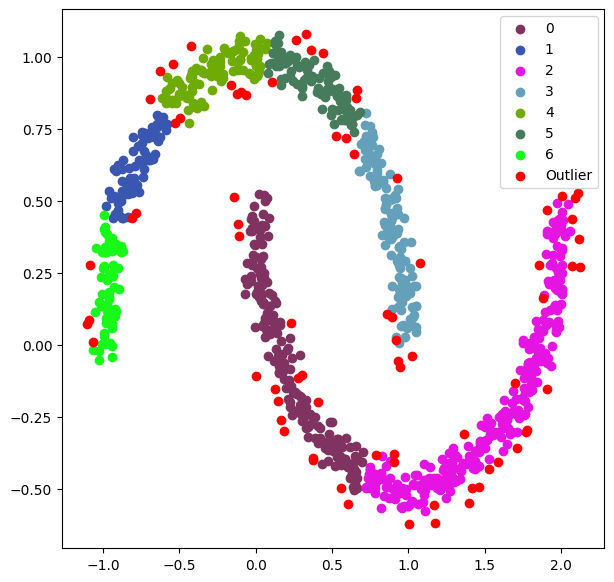

In [4]:
cmap_bold = ['#803260', '#3956b1', '#e614e3', '#64a0b9', '#6eab04', '#467b5c', '#17fa19', '#FF0000']

plt.figure(figsize=(7, 7))

plt.scatter(X[y_pred==0, 0], X[y_pred==0, 1], c=cmap_bold[0], label='0')
plt.scatter(X[y_pred==1, 0], X[y_pred==1, 1], c=cmap_bold[1], label='1')
plt.scatter(X[y_pred==2, 0], X[y_pred==2, 1], c=cmap_bold[2], label='2')
plt.scatter(X[y_pred==3, 0], X[y_pred==3, 1], c=cmap_bold[3], label='3')
plt.scatter(X[y_pred==4, 0], X[y_pred==4, 1], c=cmap_bold[4], label='4')
plt.scatter(X[y_pred==5, 0], X[y_pred==5, 1], c=cmap_bold[5], label='5')
plt.scatter(X[y_pred==6, 0], X[y_pred==6, 1], c=cmap_bold[6], label='6')
plt.scatter(X[y_pred==-1, 0], X[y_pred==-1, 1], c=cmap_bold[7], label='Outlier')

plt.legend()
plt.show()



## Ejercicio 1. 

DBScan nos separó cada medialuna en hartos pedazos. Si te fijas en el pedazo verde, esto puede haber sido por que hay unos puntos que están un poco lejos. Si queremos que el pedazo verde y el azul, por ejemplo, nos quede en una componente conexa, tendríamos que aumentar la distancia bajo la cual consideramos dos puntos _conectados_. Prueba ahora usando algunos valores de epsilon más grande. ¿Cómo queda ahora el clúster? 

In [11]:

def diff_epsilions(epsilion):
    dbscan = DBSCAN(eps=epsilion, min_samples=5)
    y_pred = dbscan.fit_predict(X)
    unique = np.unique(y_pred)
    clusters = len([x for x in unique if x >= 0])
    outliers = len([x for x in unique if 0 > x])

    plt.figure(figsize=(7, 7))
    plt.scatter(X[y_pred==0, 0], X[y_pred==0, 1], c=cmap_bold[0], label='0')
    plt.scatter(X[y_pred==1, 0], X[y_pred==1, 1], c=cmap_bold[1], label='1')
    plt.scatter(X[y_pred==2, 0], X[y_pred==2, 1], c=cmap_bold[2], label='2')
    plt.scatter(X[y_pred==3, 0], X[y_pred==3, 1], c=cmap_bold[3], label='3')
    plt.scatter(X[y_pred==4, 0], X[y_pred==4, 1], c=cmap_bold[4], label='4')
    plt.scatter(X[y_pred==5, 0], X[y_pred==5, 1], c=cmap_bold[5], label='5')
    plt.scatter(X[y_pred==6, 0], X[y_pred==6, 1], c=cmap_bold[6], label='6')
    plt.scatter(X[y_pred==-1, 0], X[y_pred==-1, 1], c=cmap_bold[7], label='Outlier')

    plt.title(f"Epsilion={epsilion}, clusters={clusters}, Outliers={outliers}")
    plt.legend()
    plt.show()
    



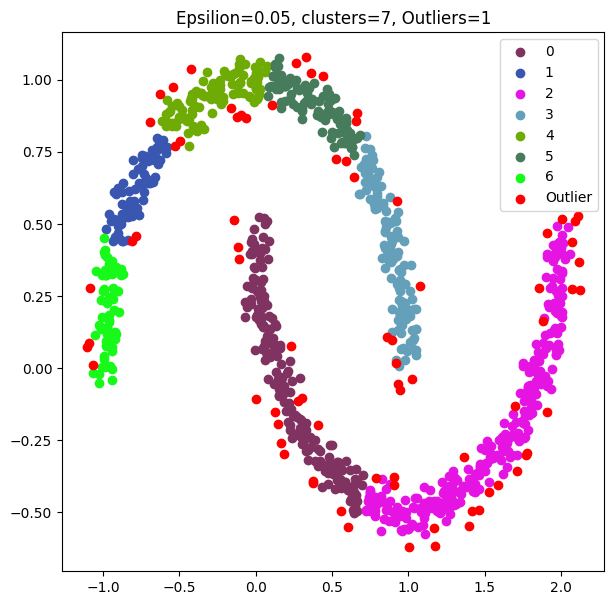

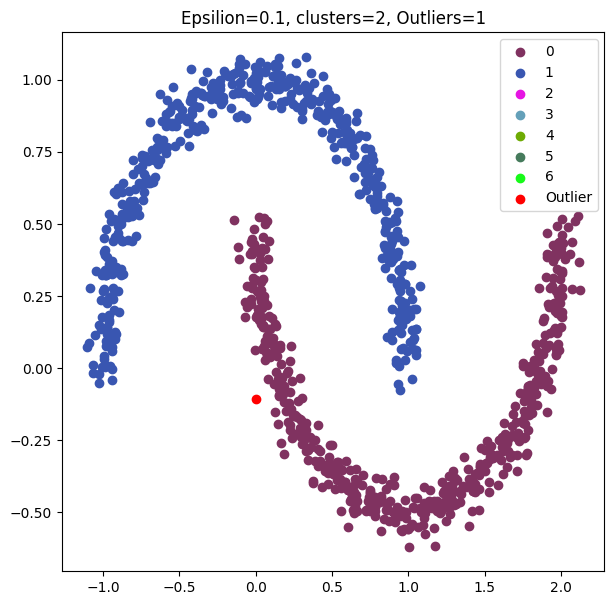

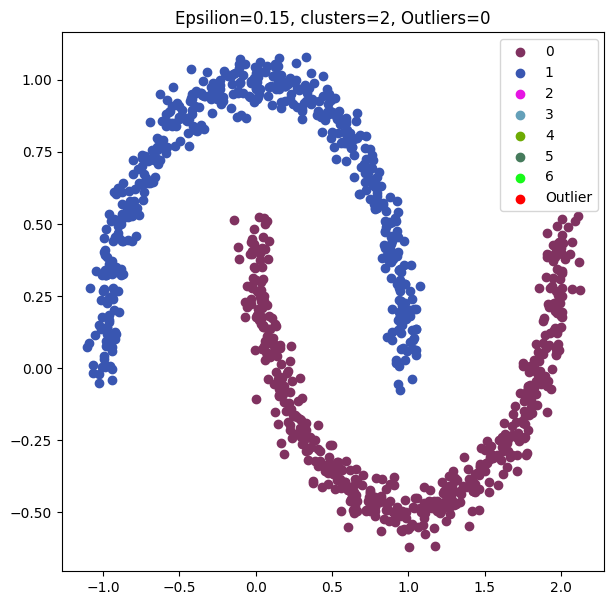

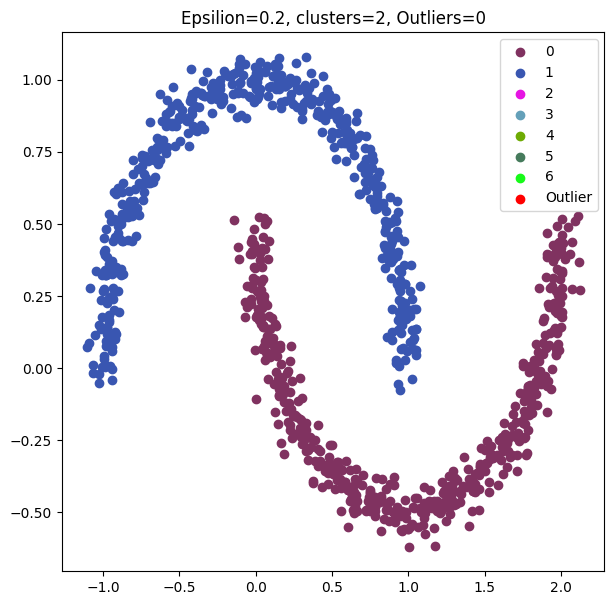

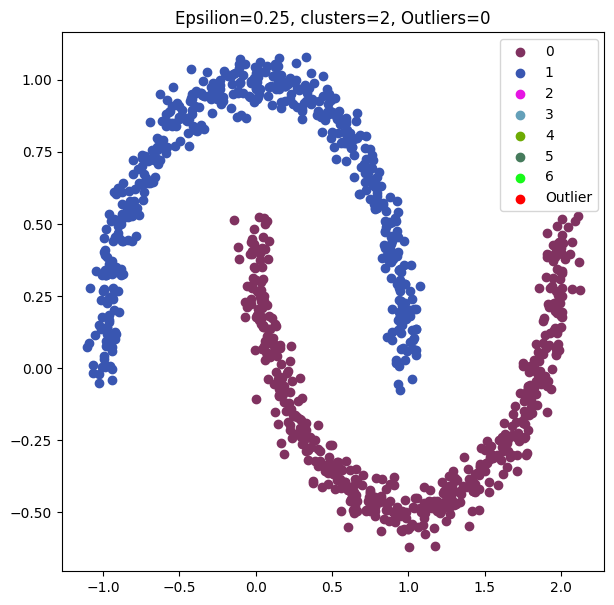

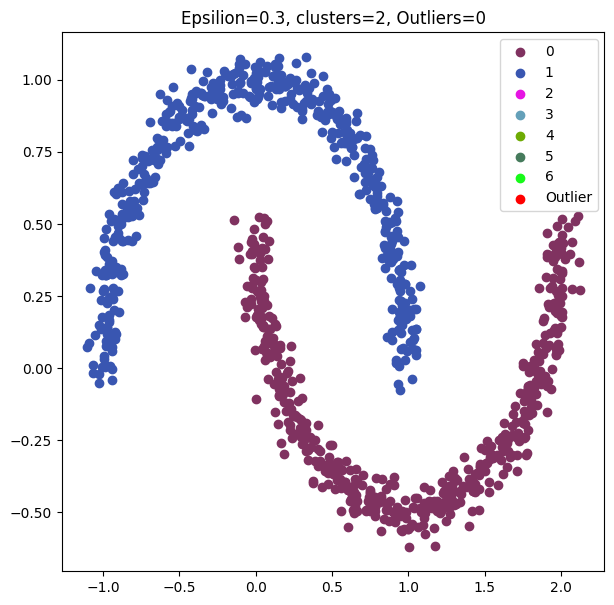

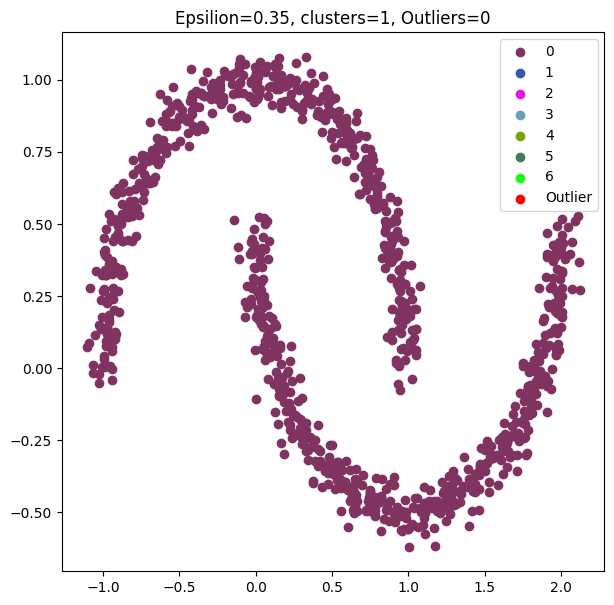

In [13]:
for i in [x/100 for x in range(5, 40)]:
    diff_epsilions(i)

## GMM

Veamos ahora que pasa si aplicamos GMM al mismo dataset. Para hacer una comparación inicial, vamos a pedir 7 clústers, luego veremos que pasa cuando pedimos solo dos. 

In [7]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=7, random_state=42)
y_pred = gmm.fit_predict(X)


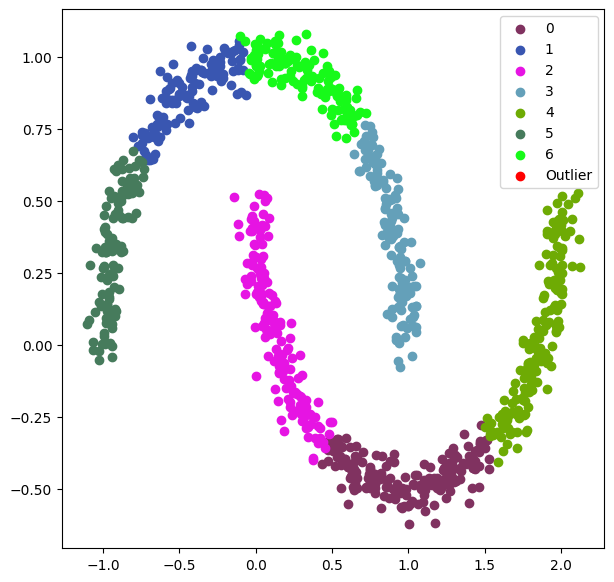

In [8]:
cmap_bold = ['#803260', '#3956b1', '#e614e3', '#64a0b9', '#6eab04', '#467b5c', '#17fa19', '#FF0000']

plt.figure(figsize=(7, 7))

plt.scatter(X[y_pred==0, 0], X[y_pred==0, 1], c=cmap_bold[0], label='0')
plt.scatter(X[y_pred==1, 0], X[y_pred==1, 1], c=cmap_bold[1], label='1')
plt.scatter(X[y_pred==2, 0], X[y_pred==2, 1], c=cmap_bold[2], label='2')
plt.scatter(X[y_pred==3, 0], X[y_pred==3, 1], c=cmap_bold[3], label='3')
plt.scatter(X[y_pred==4, 0], X[y_pred==4, 1], c=cmap_bold[4], label='4')
plt.scatter(X[y_pred==5, 0], X[y_pred==5, 1], c=cmap_bold[5], label='5')
plt.scatter(X[y_pred==6, 0], X[y_pred==6, 1], c=cmap_bold[6], label='6')
plt.scatter(X[y_pred==-1, 0], X[y_pred==-1, 1], c=cmap_bold[7], label='Outlier')

plt.legend()
plt.show()


Tratemos de importar ahora las elipses que genera el modelo de GMM

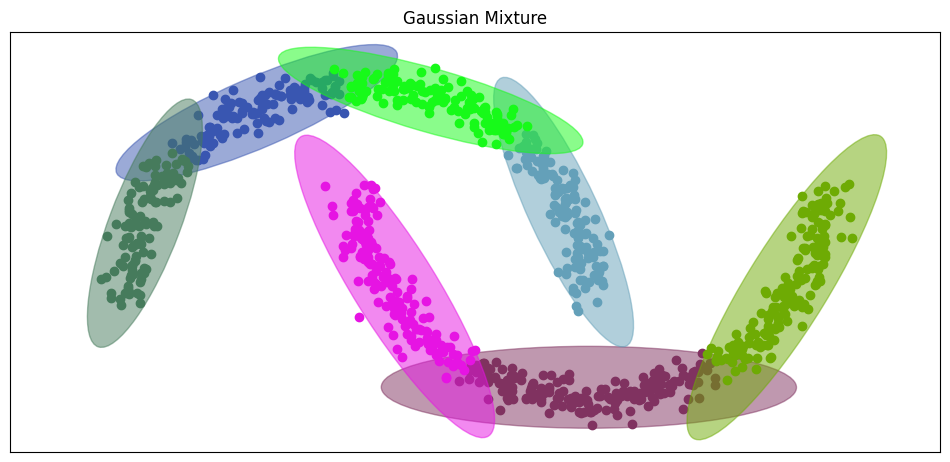

In [9]:
import itertools
from scipy import linalg
import matplotlib as mpl

color_iter = itertools.cycle(['#803260', '#3956b1', '#e614e3', '#64a0b9', '#6eab04', '#467b5c', '#17fa19', '#FF0000'])


def plot_results(X, Y_, means, covariances, index, title):
    splot = plt.subplot(2, 1, 1 + index)
    for i, (mean, covar, color) in enumerate(zip(
            means, covariances, color_iter)):
        v, w = linalg.eigh(covar)
        v = 4. * np.sqrt(2.) * np.sqrt(v)
        u = w[0] / linalg.norm(w[0])
        # as the DP will not use every component it has access to
        # unless it needs it, we shouldn't plot the redundant
        # components.
        if not np.any(Y_ == i):
            continue
        plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], color=color)

        # Plot an ellipse to show the Gaussian component
        angle = np.arctan(u[1] / u[0])
        angle = 180. * angle / np.pi  # convert to degrees
        ell = mpl.patches.Ellipse(mean, v[0], v[1], angle=180. + angle, color=color)
        ell.set_clip_box(splot.bbox)
        ell.set_alpha(0.5)
        splot.add_artist(ell)

    plt.xlim(-1.5, 2.5)
    plt.ylim(-0.75, 1.25)
    plt.xticks(())
    plt.yticks(())
    plt.title(title)

plt.figure(figsize=(12, 12))   
plot_results(X, y_pred, gmm.means_, gmm.covariances_, 0,'Gaussian Mixture')

Y veamos ahora que pasa con dos componentes. 

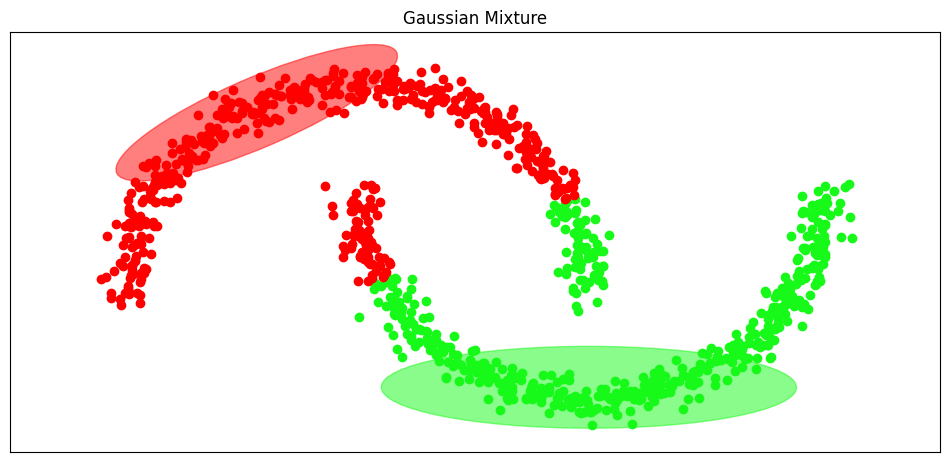

In [10]:
gmm2 = GaussianMixture(n_components=2, random_state=42)
y_pred2 = gmm2.fit_predict(X)


color_iter = itertools.cycle(['#17fa19', '#FF0000'])


plt.figure(figsize=(12, 12))   
plot_results(X, y_pred2, gmm.means_, gmm.covariances_, 0,'Gaussian Mixture')



## Ejercicio 2

Mira como clasifican estos dos algoritmos el dataset MNIST de la tarea. Concentrate sólo en el set de datos resultante de reducir la dimensionalidad con T-SNE 